Find out the overlap between our two benchmarks

In [88]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from scipy.stats import fisher_exact
import pandas as pd
%run AnalysisFunctions.ipynb

C:\Users\hamda\AppData\Local\Temp\ipykernel_37592\3164730489.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ground_truth_depmap_hit = ground_truth_depmap_hit.replace({True: 1, False: 0})


In [131]:
from IPython.display import display, Markdown
def plot_hm(df, depmap, Koferle, title,ax):
    
    zdLFC = pd.read_csv(df)

    zdLFC = zdLFC.rename(columns={zdLFC.columns[0]: 'GENE'})

    zdLFC = zdLFC.set_index('GENE')
    zdLFC
    zdLFC = reindex_alphbetically(zdLFC)

    zdLFC = zdLFC.rename_axis("sorted_gene_pair")

    
    merged = pd.merge(zdLFC, Koferle.rename(columns={'ground_truth': 'koferle'}), on='sorted_gene_pair', how='left')
    merged = pd.merge(merged, depmap.rename(columns={'ground_truth': 'DepMap'}), on='sorted_gene_pair', how='left')

    
    merged = merged.dropna()

    # Assuming df contains binary columns 'Depmap' and 'Koferle'
    contingency = pd.crosstab(merged['DepMap'], merged['koferle'])
    #print(contingency)
    # Run Fisher's Exact Test
    oddsratio, p_value = fisher_exact(contingency)
    #print(f"Fisher's test p-value: {p_value}")

    #Create sets of indices where each is 1
    depmap_set = set(merged[merged['DepMap'] == 1].index)
    koferle_set = set(merged[merged['koferle'] == 1].index)

    #Plot Venn diagram
    plt.sca(ax)  # set current axes
    venn2([depmap_set, koferle_set], set_labels=('DepMap', 'Koferle'))
    ax.set_title(title + "\n" + f"FET p-value: {p_value:.3e}", fontsize=10)

    # sns.heatmap(
    # contingency,
    # annot=True,
    # fmt='d',
    # cmap='Greys',          # Greys gives neutral grayscale
    # cbar=False,            # Remove colorbar
    # linewidths=0.5,
    # linecolor='black',
    # ax=ax)
    # ax.set_ylim(contingency.shape[0], 0)
    # # Fix missing gridlines
    # #ax.set_ylim(len(contingency), 0)
    # ax.set_title(title + f"\nFisher's Exact Test p = {p_value:.4f}")

    

    #display(Markdown("### Contingency Table (DepMap vs Koferle)"))
    #display(contingency)

    #display(Markdown(f"**Fisher's Exact Test p-value**: `{p_value:.4e}`"))





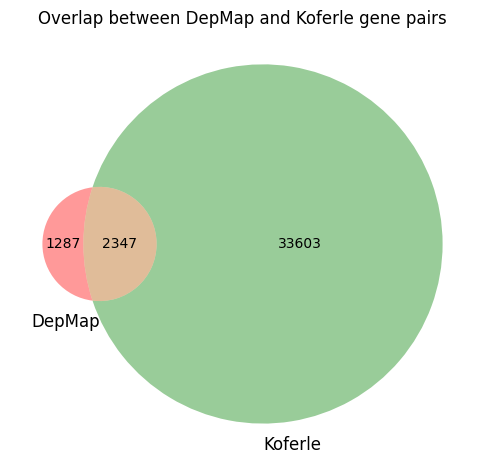

In [138]:


depmap_set = set(ground_truth_depmap_hit.index)
koferle_set = set(Koferle.index)

# Plot Venn diagram
plt.figure(figsize=(6,6))
venn2([depmap_set, koferle_set], set_labels=('DepMap', 'Koferle'))
plt.title('Overlap between DepMap and Koferle gene pairs', fontsize=12)
plt.show()





In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
merged = pd.merge(ground_truth_depmap_hit.rename(columns={'ground_truth': 'DepMap'}), Koferle.rename(columns={'ground_truth': 'Koferle'}), on='sorted_gene_pair', how='inner')
merged
from scipy.stats import fisher_exact

contingency = pd.crosstab(merged['DepMap'], merged['Koferle'])
print(contingency)
# Run Fisher's Exact Test
oddsratio, p_value = fisher_exact(contingency)
print(f"Fisher's test p-value: {p_value}")

merged = merged[(merged['DepMap'] == 1 )| (merged['Koferle'] == 1)]
contingency = pd.crosstab(merged['DepMap'], merged['Koferle'])
print(contingency)
# Run Fisher's Exact Test
oddsratio, p_value = fisher_exact(contingency)
print(f"Fisher's test p-value: {p_value}")

Koferle   0.0  1.0
DepMap            
0.0      2995   43
1.0        42   64
Fisher's test p-value: 2.0094395620995237e-75
Koferle  0.0  1.0
DepMap           
0.0        0   43
1.0       42   64
Fisher's test p-value: 3.765393176231904e-08


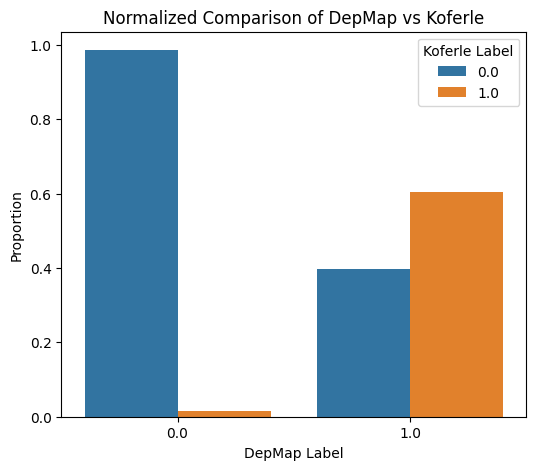

In [31]:
# Count combinations
summary = merged.groupby(['DepMap', 'Koferle']).size().reset_index(name='count')

# Normalize within DepMap groups
summary['total'] = summary.groupby('DepMap')['count'].transform('sum')
summary['proportion'] = summary['count'] / summary['total']

# Plot
import seaborn as sns

plt.figure(figsize=(6,5))
sns.barplot(data=summary, x='DepMap', y='proportion', hue='Koferle')
plt.title("Normalized Comparison of DepMap vs Koferle")
plt.ylabel("Proportion")
plt.xlabel("DepMap Label")
plt.legend(title="Koferle Label")
plt.show()


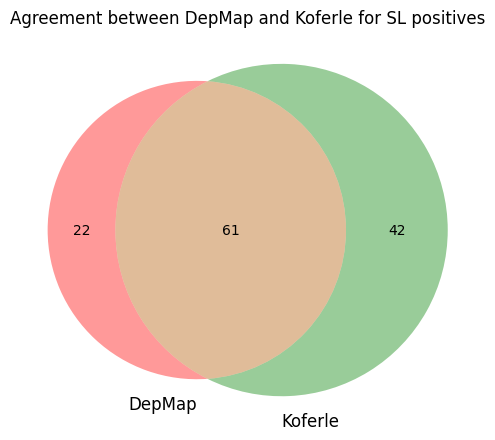

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
merged = pd.merge(ground_truth_depmap_hit.rename(columns={'ground_truth': 'depmap'}), Koferle.rename(columns={'ground_truth': 'koferle'}), on='sorted_gene_pair', how='outer')
merged
merged = merged.dropna()
# Create sets of indices where each is 1
depmap_set = set(merged[merged['depmap'] == 1].index)
koferle_set = set(merged[merged['koferle'] == 1].index)

# Plot Venn diagram
plt.figure(figsize=(6,6))
venn2([depmap_set, koferle_set], set_labels=('DepMap', 'Koferle'))
plt.title('Agreement between DepMap and Koferle for SL positives')
plt.show()

# Dede

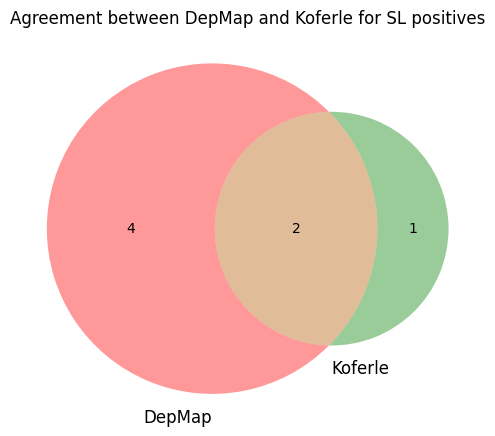

koferle  0.0  1.0
DepMap           
0.0      113    1
1.0        6    2
Fisher's test p-value: 0.011001219346971954


In [94]:
plot_venn("../zdLFC Scripts/zdLFC Output/DeDe_zdLFC.csv", ground_truth_depmap_hit, Koferle, "Dede")

# Ito

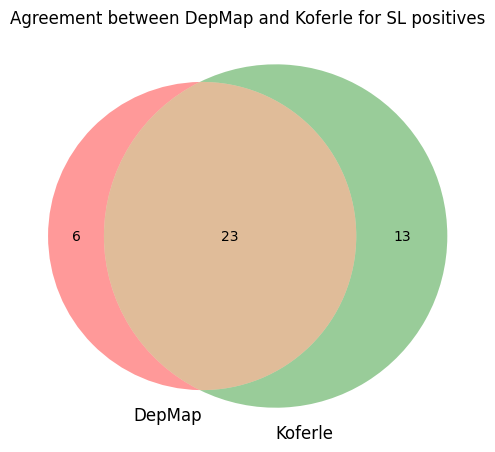

koferle  0.0  1.0
DepMap           
0.0      681   14
1.0       11   25
Fisher's test p-value: 4.341504419100639e-28


In [95]:
plot_venn("../zdLFC Scripts/zdLFC Output/ITO.csv", ground_truth_depmap_hit, Koferle, "Dede")



# Parrish

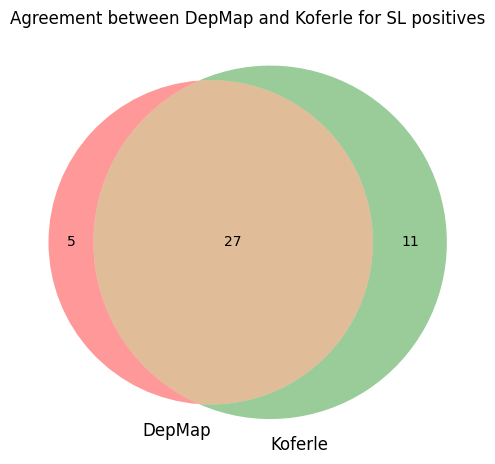

koferle  0.0  1.0
DepMap           
0.0      166   12
1.0       14   28
Fisher's test p-value: 5.680633677812151e-16


In [96]:
plot_venn("../zdLFC Scripts/zdLFC Output/Parrish_Hela.csv", ground_truth_depmap_hit, Koferle, "Dede")


# Chymera

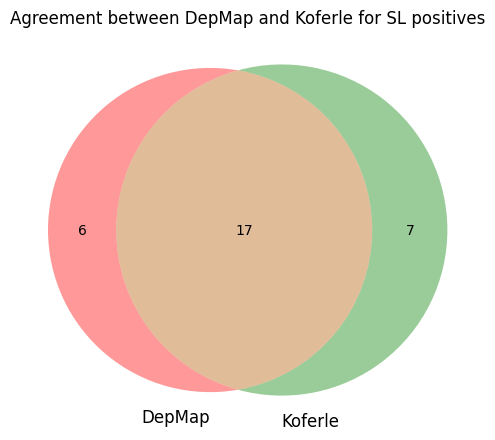

koferle  0.0  1.0
DepMap           
0.0      167    7
1.0       11   18
Fisher's test p-value: 4.471690358623655e-13


In [97]:
plot_venn("../zdLFC Scripts/zdLFC Output/ChymeraHAP1.csv", ground_truth_depmap_hit, Koferle, "Dede")


# Thompson

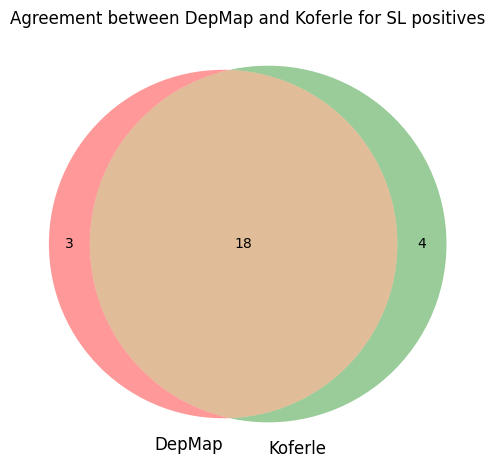

koferle  0.0  1.0
DepMap           
0.0      120    4
1.0        9   18
Fisher's test p-value: 2.8946739849376145e-13


In [98]:
plot_venn("../zdLFC Scripts/zdLFC Output/Thompson_zdLFC.csv", ground_truth_depmap_hit, Koferle, "Dede")


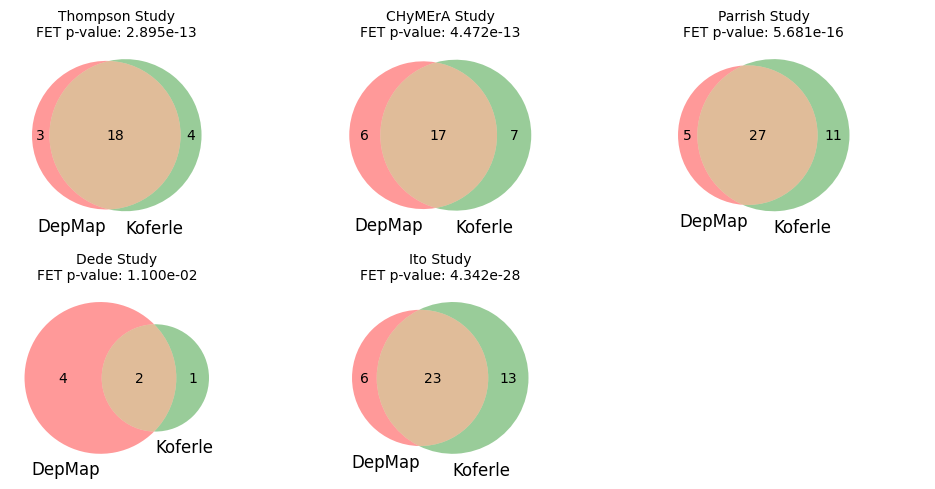

In [132]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()

plot_hm("../zdLFC Scripts/zdLFC Output/Thompson_zdLFC.csv", ground_truth_depmap_hit, Koferle, "Thompson Study", ax = axes[0])
plot_hm("../zdLFC Scripts/zdLFC Output/ChymeraHAP1.csv", ground_truth_depmap_hit, Koferle, "CHyMErA Study", axes[1])
plot_hm("../zdLFC Scripts/zdLFC Output/Parrish_Hela.csv", ground_truth_depmap_hit, Koferle, "Parrish Study", axes[2])
plot_hm("../zdLFC Scripts/zdLFC Output/DeDe_zdLFC.csv", ground_truth_depmap_hit, Koferle, "Dede Study", ax = axes[3])
plot_hm("../zdLFC Scripts/zdLFC Output/ITO.csv", ground_truth_depmap_hit, Koferle, "Ito Study", ax = axes[4])
axes[5].axis('off')

plt.tight_layout()
plt.show()
